# Import Library dan Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

#ubah format visualisai
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [12]:
data = pd.read_csv('Train.csv')
data.head()

data_1 = data

# Data Cleansing

__A. Handle Missing Values__

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
data.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Berdasarkan informasi di atas, tidak ditemukan missing values pada dataset. Oleh sebab itu, dapat dilanjutkan pada proses data cleansing selanjutnya.

__B. Handle Duplicated Values__

In [5]:
data[data.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [6]:
data.duplicated().sum()

0

In [7]:
data.duplicated(subset=['ID', 'Reached.on.Time_Y.N']).sum()

0

Berdasarkan informasi di atas, tidak ditemukan duplikasi data pada dataset. Oleh sebab itu, dapat dilanjutkan pada proses data cleansing selanjutnya.

__C. Handle Outliers__

In [8]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


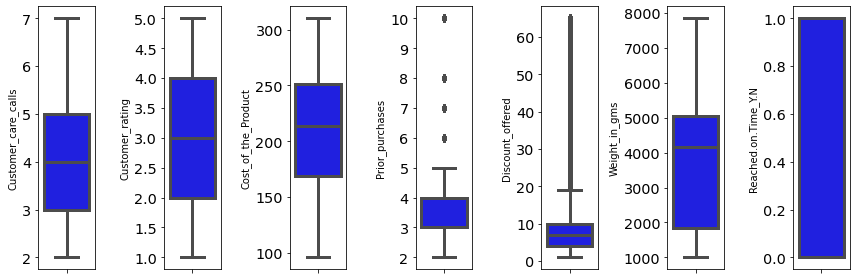

In [9]:
nums = ['Customer_care_calls','Customer_rating','Cost_of_the_Product',
        'Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N']

cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']

#Distribution plot
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='blue', orient='v')
    plt.tight_layout()

Berdasarkan boxplot di atas, ditemukan outliers pada Prior_purchases dan Discount_offered

In [10]:
#IQR
#Prior_purchases
Q1 = data['Prior_purchases'].quantile(0.25)
Q3 = data['Prior_purchases'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((data['Prior_purchases'] >= low_limit) & (data['Prior_purchases'] <= high_limit))
    
df1 = data[filtered_entries]
df1

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,0
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0


In [11]:
#Discount_offered
Q1 = df1['Discount_offered'].quantile(0.25)
Q3 = df1['Discount_offered'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df1['Discount_offered'] >= low_limit) & (df1['Discount_offered'] <= high_limit))
    
df2 = df1[filtered_entries]
df2

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,0
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0


Setelah dilakukan pembersihan outliers menggunakan IQR, didapatkan data bersih sebesar 7971 baris

In [14]:
#Handle outliers menggunakan z-score

print(f'Jumlah baris sebelum memfilter outliers: {len(data_1)}')

filtered_entries = np.array([True] * len(data_1))

for col in nums:
    zscore = abs(stats.zscore(data_1[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
data_1= data_1[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outliers: {len(data_1)}')

Jumlah baris sebelum memfilter outliers: 10999
Jumlah baris setelah memfilter outliers: 10642


__D. Feature Transformation__

Karena kolom Discount_offered memiliki skewed positif, maka dilakukan log transformation

<AxesSubplot:xlabel='Discount_offered', ylabel='Density'>

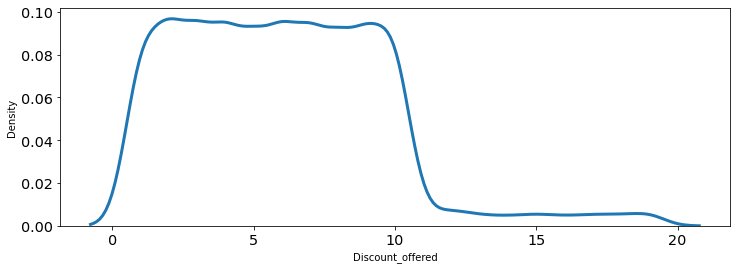

In [12]:
#Feature transformation : Log transformation
#Lihat distribusi 
df = df2
sns.kdeplot(df['Discount_offered'])

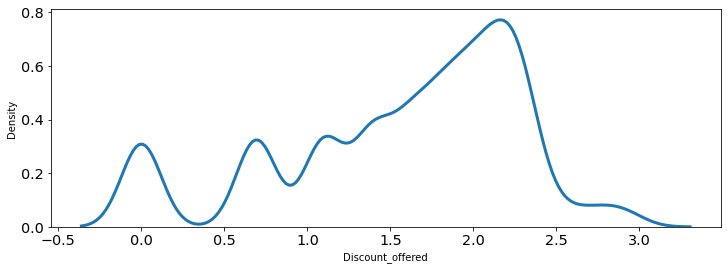

In [13]:
#Setelah log transformation
sns.kdeplot(np.log(df['Discount_offered']));

In [14]:
#Transformasi
df['log_Discount_offered'] = np.log(df['Discount_offered']);
                                 
#Drop kolom Cost_of_the_Product dan 
df = df.drop(columns='Discount_offered');
df

C:\Users\Windows10\AppData\Local\Temp\ipykernel_13188\1811832652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_Discount_offered'] = np.log(df['Discount_offered']);


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Weight_in_gms,Reached.on.Time_Y.N,log_Discount_offered
3,4,B,Flight,3,3,176,4,medium,M,1177,1,2.302585
5,6,F,Flight,3,1,162,3,medium,F,1417,1,2.484907
6,7,D,Flight,3,4,250,3,low,F,2371,1,1.098612
8,9,A,Flight,3,4,150,3,low,F,1861,1,2.397895
10,11,C,Flight,3,4,189,2,medium,M,2888,1,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...
10992,10993,D,Ship,5,1,236,5,medium,M,1906,0,1.098612
10994,10995,A,Ship,4,1,252,5,medium,F,1538,1,0.000000
10995,10996,B,Ship,4,1,232,5,medium,F,1247,0,1.791759
10996,10997,C,Ship,5,4,242,5,low,F,1155,0,1.386294


__E. Feature Encoding__

Feature Encoding akan dilakukan untuk Feature Kategorikal.

__1. Label Encoding__

Dilakukan untuk feature kategorikal biner atau ordinal gradual.
Feature: Gender, Product Importance, Reached on Time (sudah dari data)

In [15]:
#Label Encoding Gender
mapping_gender = {
    'F' : 0,
    'M' : 1
}

df['Gender'] = df['Gender'].map(mapping_gender)

In [16]:
#Label Encoding Product Importance
mapping_PI = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

df['Product_importance'] = df['Product_importance'].map(mapping_PI)

In [17]:
#Label Encoding Reached on time
mapping_PI = {
    0: 1,
    1 : 0
}

df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].map(mapping_PI)

__2. One Hot Encoding__

Digunakan untuk feature kategorikal yang umum yang tidak memenuhi syarat label encoding yaitu warehouse block dan mode of shipment.

In [18]:
# OHE Warehouse Block
wb_category = pd.get_dummies(df['Warehouse_block'], prefix='block')
# OHE Mode of Shipment
ms_category = pd.get_dummies(df['Mode_of_Shipment'], prefix='mode')
# Gabungkan OHE ke data 
df = df.join([wb_category, ms_category])
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Weight_in_gms,Reached.on.Time_Y.N,log_Discount_offered,block_A,block_B,block_C,block_D,block_F,mode_Flight,mode_Road,mode_Ship
3,4,B,Flight,3,3,176,4,1,1,1177,0,2.302585,0,1,0,0,0,1,0,0
5,6,F,Flight,3,1,162,3,1,0,1417,0,2.484907,0,0,0,0,1,1,0,0
6,7,D,Flight,3,4,250,3,0,0,2371,0,1.098612,0,0,0,1,0,1,0,0
8,9,A,Flight,3,4,150,3,0,0,1861,0,2.397895,1,0,0,0,0,1,0,0
10,11,C,Flight,3,4,189,2,1,1,2888,0,2.484907,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,10993,D,Ship,5,1,236,5,1,1,1906,1,1.098612,0,0,0,1,0,0,0,1
10994,10995,A,Ship,4,1,252,5,1,0,1538,0,0.000000,1,0,0,0,0,0,0,1
10995,10996,B,Ship,4,1,232,5,1,0,1247,1,1.791759,0,1,0,0,0,0,0,1
10996,10997,C,Ship,5,4,242,5,0,0,1155,1,1.386294,0,0,1,0,0,0,0,1


In [19]:
# drop kolom yang sudah di-encoding & ditransformasi
df = df.drop(columns=['Warehouse_block', 'Mode_of_Shipment'])
df

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Weight_in_gms,Reached.on.Time_Y.N,log_Discount_offered,block_A,block_B,block_C,block_D,block_F,mode_Flight,mode_Road,mode_Ship
3,4,3,3,176,4,1,1,1177,0,2.302585,0,1,0,0,0,1,0,0
5,6,3,1,162,3,1,0,1417,0,2.484907,0,0,0,0,1,1,0,0
6,7,3,4,250,3,0,0,2371,0,1.098612,0,0,0,1,0,1,0,0
8,9,3,4,150,3,0,0,1861,0,2.397895,1,0,0,0,0,1,0,0
10,11,3,4,189,2,1,1,2888,0,2.484907,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,10993,5,1,236,5,1,1,1906,1,1.098612,0,0,0,1,0,0,0,1
10994,10995,4,1,252,5,1,0,1538,0,0.000000,1,0,0,0,0,0,0,1
10995,10996,4,1,232,5,1,0,1247,1,1.791759,0,1,0,0,0,0,0,1
10996,10997,5,4,242,5,0,0,1155,1,1.386294,0,0,1,0,0,0,0,1


__F. Handle Class Imbalance__

In [20]:
# Handle class imbalance
df['Reached.on.Time_Y.N'].value_counts()

1    4024
0    3947
Name: Reached.on.Time_Y.N, dtype: int64

Tidak ditemukan class imbalance. Sehingga tidak perlu dilakukan preparation handle class imbalance.

# Feature Engineering

__A. Feature Selection__

In [21]:
df.columns

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Product_importance', 'Gender', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'log_Discount_offered', 'block_A', 'block_B',
       'block_C', 'block_D', 'block_F', 'mode_Flight', 'mode_Road',
       'mode_Ship'],
      dtype='object')

In [22]:
df = df.drop(columns = ['ID', 'Customer_rating'])
df.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Weight_in_gms,Reached.on.Time_Y.N,log_Discount_offered,block_A,block_B,block_C,block_D,block_F,mode_Flight,mode_Road,mode_Ship
3,3,176,4,1,1,1177,0,2.302585,0,1,0,0,0,1,0,0
5,3,162,3,1,0,1417,0,2.484907,0,0,0,0,1,1,0,0
6,3,250,3,0,0,2371,0,1.098612,0,0,0,1,0,1,0,0
8,3,150,3,0,0,1861,0,2.397895,1,0,0,0,0,1,0,0
10,3,189,2,1,1,2888,0,2.484907,0,0,1,0,0,1,0,0


Berdasarkan Proses EDA dan Data Cleansing yang sudah dilakukan, akan dilakukan pembuangan beberapa feature yang kurang relevan dan tidak berpengaruh pada modelling seperti :

* ID : Karena hanya mewakili nilai unik dari customer
* Customer_rating : Karena memiliki korelasi terendah (0.01) terhadap Reached.on.Time_Y.N pada heatmap

Berdasarkan kesimpulan diatas, sisa feature selain feature diatas akan digunakan dalam proses Modelling dengan Reached.on.time akan dijadikan sebagai Target dari Modelling.

__B. Feature Extraction__

In [23]:
#Kolom Segment_CostProduct berisi segmentasi dari kolom Cost_of_the_Product
Q1_cp = np.percentile(df['Cost_of_the_Product'],25)
Q3_cp = np.percentile(df['Cost_of_the_Product'],75)
print('Q1: ', Q1_cp)
print('Q3: ', Q3_cp)

Q1:  173.0
Q3:  254.0


In [24]:
#Low : nilai < Q1
#Medium : Q1 <= nilai <= Q3  
#(nilai >= Q1 | nilai <= Q3)
#High : nilai > Q3 

#Kategori Segment_CostProduct (Low=0, Medium=1, High=2)
#menggunakan iterrows
list_segment = []
#try : #error handling
for i, kolom in df.iterrows(): #menggunakan data awal (superstore)
    if kolom['Cost_of_the_Product'] < Q1_cp: 
      segment = 0
    elif Q1_cp <= kolom['Cost_of_the_Product'] <= Q3_cp:
      segment = 1
    else:
      segment = 2
    list_segment.append(segment)
#except :
  #print("Error")

df['Segment_CostProduct'] = list_segment
df.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Weight_in_gms,Reached.on.Time_Y.N,log_Discount_offered,block_A,block_B,block_C,block_D,block_F,mode_Flight,mode_Road,mode_Ship,Segment_CostProduct
3,3,176,4,1,1,1177,0,2.302585,0,1,0,0,0,1,0,0,1
5,3,162,3,1,0,1417,0,2.484907,0,0,0,0,1,1,0,0,0
6,3,250,3,0,0,2371,0,1.098612,0,0,0,1,0,1,0,0,1
8,3,150,3,0,0,1861,0,2.397895,1,0,0,0,0,1,0,0,0
10,3,189,2,1,1,2888,0,2.484907,0,0,1,0,0,1,0,0,1


In [25]:
#Kolom Segment_Weight berisi segmentasi dari kolom Weight_in_gms
Q1_w = np.percentile(df['Weight_in_gms'],25)
Q3_w = np.percentile(df['Weight_in_gms'],75)
print('Q1: ', Q1_w)
print('Q3: ', Q3_w)

Q1:  1955.5
Q3:  5244.0


In [26]:
#Kategori Segment_Weight (Low=0, Medium=1, High=2)
#menggunakan iterrows
list_segment = []
#try : #error handling
for i, kolom in df.iterrows(): #menggunakan data awal (superstore)
    if kolom['Weight_in_gms'] < Q1_w: 
      segment = 0
    elif Q1_w <= kolom['Weight_in_gms'] <= Q3_w:
      segment = 1
    else:
      segment = 2
    list_segment.append(segment)
#except :
  #print("Error")

df['Segment_Weight'] = list_segment
df.head()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Weight_in_gms,Reached.on.Time_Y.N,log_Discount_offered,block_A,block_B,block_C,block_D,block_F,mode_Flight,mode_Road,mode_Ship,Segment_CostProduct,Segment_Weight
3,3,176,4,1,1,1177,0,2.302585,0,1,0,0,0,1,0,0,1,0
5,3,162,3,1,0,1417,0,2.484907,0,0,0,0,1,1,0,0,0,0
6,3,250,3,0,0,2371,0,1.098612,0,0,0,1,0,1,0,0,1,1
8,3,150,3,0,0,1861,0,2.397895,1,0,0,0,0,1,0,0,0,0
10,3,189,2,1,1,2888,0,2.484907,0,0,1,0,0,1,0,0,1,1


In [27]:
#Drop kolom Cost_of_the_Product dan Weight_in_gms
df = df.drop(columns = ['Cost_of_the_Product', 'Weight_in_gms'])
df.head()

,Customer_care_calls,Prior_purchases,Product_importance,Gender,Reached.on.Time_Y.N,log_Discount_offered,block_A,block_B,block_C,block_D,block_F,mode_Flight,mode_Road,mode_Ship,Segment_CostProduct,Segment_Weight
3,3,4,1,1,0,2.302585,0,1,0,0,0,1,0,0,1,0
5,3,3,1,0,0,2.484907,0,0,0,0,1,1,0,0,0,0
6,3,3,0,0,0,1.098612,0,0,0,1,0,1,0,0,1,1
8,3,3,0,0,0,2.397895,1,0,0,0,0,1,0,0,0,0
10,3,2,1,1,0,2.484907,0,0,1,0,0,1,0,0,1,1


Rename kolom Reached.on.Time_Y.N menjadi Reached_on_time agar mudah dalam pemanggilan field

In [28]:
df.rename(columns={'Reached.on.Time_Y.N':'Reached_on_time'},inplace=True)
df.head()               

,Customer_care_calls,Prior_purchases,Product_importance,Gender,Reached_on_time,log_Discount_offered,block_A,block_B,block_C,block_D,block_F,mode_Flight,mode_Road,mode_Ship,Segment_CostProduct,Segment_Weight
3,3,4,1,1,0,2.302585,0,1,0,0,0,1,0,0,1,0
5,3,3,1,0,0,2.484907,0,0,0,0,1,1,0,0,0,0
6,3,3,0,0,0,1.098612,0,0,0,1,0,1,0,0,1,1
8,3,3,0,0,0,2.397895,1,0,0,0,0,1,0,0,0,0
10,3,2,1,1,0,2.484907,0,0,1,0,0,1,0,0,1,1


__C. Additional Features__

Feature yang mungkin dibutuhkan dalam membantu proses modelling :
1. Late_duration : untuk mengetahui durasi keterlambatan pengiriman
2. Late_history : sebagai penanda apakah user pernah mengalami keterlambatan pengiriman
3. Distance : informasi mengenai jarak pengiriman dari warehouse ke alamat customer
4. Postal_code : informasi mengenai kode pos alamat customer